In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object
The type of this column's values is object
------------------------------
------------------------------
Indices with corrupted data: [ 3378  7512 20650]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


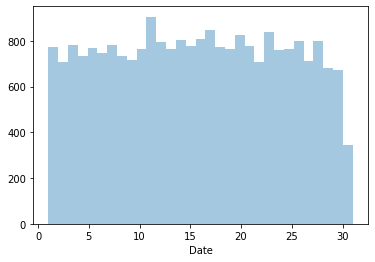

In [8]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("/content/drive/MyDrive/CSVs/database.csv")

# set seed for reproducibility
np.random.seed(0)

###################################################

# TODO: Your code here!
print(earthquakes['Date'].head())
print("The type of this column's values is object")
print("-"*30)

#This does appear to be an issue with data entry: ideally, all entries in the column have the same format. We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()
print("-"*30)

#Looks like there are two more rows that has a date in a different format. Run the code cell below to obtain the indices corresponding to those rows and print the data.
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

# TODO: Your code here
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")
earthquakes['Date'] = earthquakes['date_parsed']


# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes['Date'].dt.day


# TODO: Your 1de here!
day_of_month_earthquakes = day_of_month_earthquakes.dropna()
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)